# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [10]:
pip install wordcloud

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
import numpy as np
from collections import Counter
from nltk.corpus import stopwords

In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\srini\AppData\Roaming\nltk_data...


True

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | Good points, the cabin crew, t..."
1,"Not Verified | It was a decent flight, reason..."
2,✅ Trip Verified | I really like flying Briti...
3,✅ Trip Verified | Could not book online the ...
4,✅ Trip Verified | Having had some rough experi...


In [8]:
df.to_csv("C:/Users/srini/Downloads/forage-accenture-project/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [13]:
df = pd.read_csv('C:/Users/srini/Downloads/forage-accenture-project/BA_reviews.csv')

In [14]:
df.head()

,Unnamed: 0,reviews
0,0,"Not Verified | Good points, the cabin crew, t..."
1,1,"Not Verified | It was a decent flight, reason..."
2,2,✅ Trip Verified | I really like flying Briti...
3,3,✅ Trip Verified | Could not book online the ...
4,4,✅ Trip Verified | Having had some rough experi...


In [15]:
# Function to clean text
def clean_text(text):
    # Remove "Trip Verified" and "Not Verified"
    text = re.sub(r"(✅ Trip Verified \| )|(Not Verified \| )", "", text)
    # Remove extra white spaces
    text = text.strip()
    return text

# Apply cleaning
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

# Preview cleaned data
df[['reviews', 'cleaned_reviews']].head()


,reviews,cleaned_reviews
0,"Not Verified | Good points, the cabin crew, t...","Good points, the cabin crew, they were helpful..."
1,"Not Verified | It was a decent flight, reason...","It was a decent flight, reasonable comfortable..."
2,✅ Trip Verified | I really like flying Briti...,I really like flying British Airways particula...
3,✅ Trip Verified | Could not book online the ...,✅ Trip Verified | Could not book online the ...
4,✅ Trip Verified | Having had some rough experi...,Having had some rough experiences with BA in r...


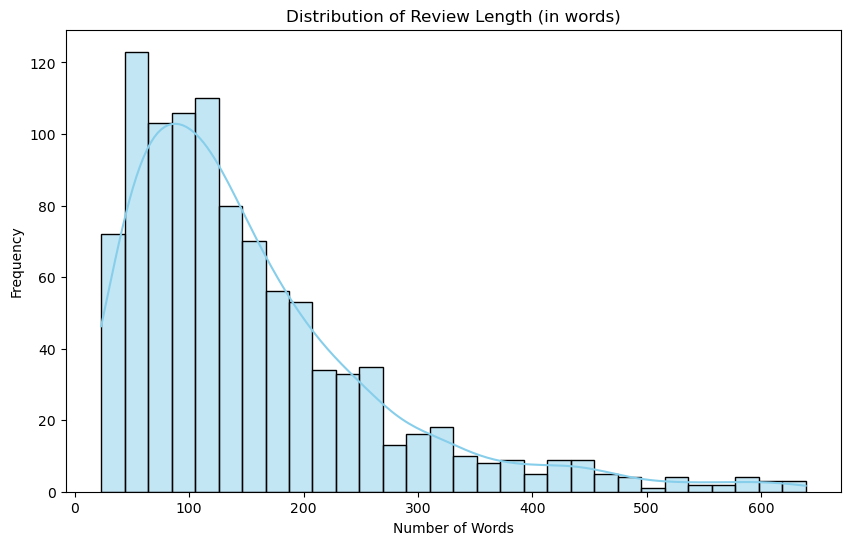

In [16]:
# Add a new column for length
df['review_length'] = df['cleaned_reviews'].apply(lambda x: len(x.split()))

# Plot
plt.figure(figsize=(10,6))
sns.histplot(df['review_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Length (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

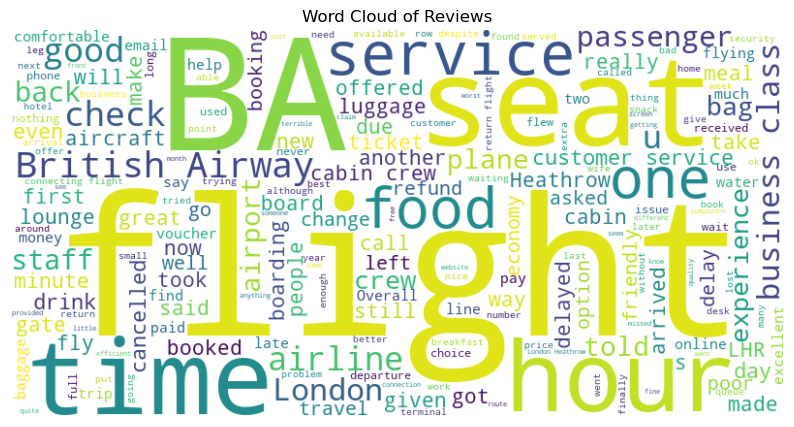

In [17]:
# Join all reviews
text = " ".join(review for review in df['cleaned_reviews'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\srini\AppData\Local\Temp\ipykernel_27016\3954512702.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


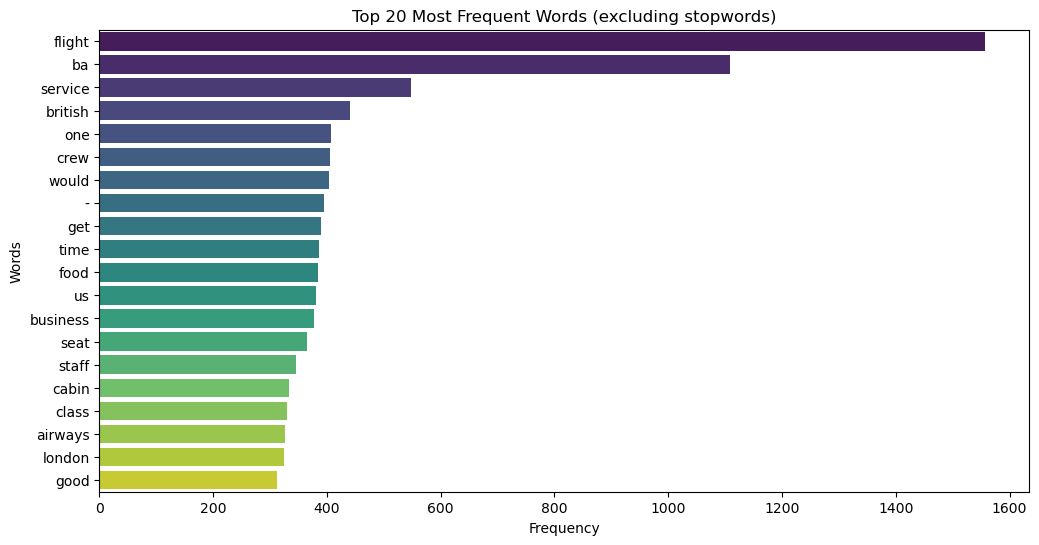

In [18]:
from collections import Counter
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Create a list of all words
all_words = []
for review in df['cleaned_reviews']:
    for word in review.lower().split():
        if word not in stop_words:
            all_words.append(word)

# Get most common
word_freq = Counter(all_words).most_common(20)

# Plot
words, counts = zip(*word_freq)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Most Frequent Words (excluding stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [19]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Apply VADER to each review
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Define Sentiment Category
def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(get_sentiment)

# Preview
df[['cleaned_reviews', 'sentiment_score', 'sentiment']].head()


,cleaned_reviews,sentiment_score,sentiment
0,"Good points, the cabin crew, they were helpful...",0.5625,Positive
1,"It was a decent flight, reasonable comfortable...",0.4054,Positive
2,I really like flying British Airways particula...,0.9652,Positive
3,✅ Trip Verified | Could not book online the ...,-0.4767,Negative
4,Having had some rough experiences with BA in r...,0.9150,Positive


C:\Users\srini\AppData\Local\Temp\ipykernel_27016\2118589655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='pastel')


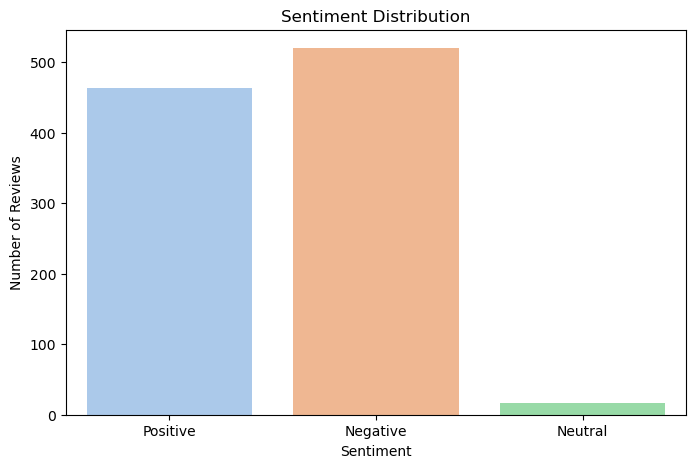

In [20]:
# Plot
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment', data=df, palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [27]:
df

,Unnamed: 0,reviews,cleaned_reviews,review_length,sentiment_score,sentiment
0,0,"Not Verified | Good points, the cabin crew, t...","Good points, the cabin crew, they were helpful...",211,0.5625,Positive
1,1,"Not Verified | It was a decent flight, reason...","It was a decent flight, reasonable comfortable...",108,0.4054,Positive
2,2,✅ Trip Verified | I really like flying Briti...,I really like flying British Airways particula...,135,0.9652,Positive
3,3,✅ Trip Verified | Could not book online the ...,✅ Trip Verified | Could not book online the ...,60,-0.4767,Negative
4,4,✅ Trip Verified | Having had some rough experi...,Having had some rough experiences with BA in r...,66,0.9150,Positive
...,...,...,...,...,...,...
995,995,✅ Trip Verified | Flying London City to Geneva...,Flying London City to Geneva. The only plus wa...,51,-0.3595,Negative
996,996,✅ Trip Verified | Los Angeles to Istanbul via...,Los Angeles to Istanbul via London. Flight bet...,107,-0.9201,Negative
997,997,✅ Trip Verified | Phoenix to Tel Aviv via Lond...,Phoenix to Tel Aviv via London. The return fro...,44,-0.5023,Negative
998,998,Not Verified | London to Kefalonia . The T5 G...,London to Kefalonia . The T5 Galleries lounge ...,107,0.8555,Positive
